In [1]:
import pandas as pd 
import numpy as np 

house_data = pd.read_csv("data.csv")

house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [2]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [3]:
house_data.nunique()

#drop street

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [4]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Whoa! Minimum price is zero!

In [5]:
house_data['price'].value_counts()

0.0         49
300000.0    42
400000.0    31
450000.0    29
600000.0    29
            ..
586500.0     1
693000.0     1
226500.0     1
257200.0     1
256000.0     1
Name: price, Length: 1741, dtype: int64

49 rows with a price of $0! The dataset is large enough that we can probably just drop these. 

In [6]:
house_data = house_data[house_data['price'] > 0]

In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4551 non-null   object 
 1   price          4551 non-null   float64
 2   bedrooms       4551 non-null   float64
 3   bathrooms      4551 non-null   float64
 4   sqft_living    4551 non-null   int64  
 5   sqft_lot       4551 non-null   int64  
 6   floors         4551 non-null   float64
 7   waterfront     4551 non-null   int64  
 8   view           4551 non-null   int64  
 9   condition      4551 non-null   int64  
 10  sqft_above     4551 non-null   int64  
 11  sqft_basement  4551 non-null   int64  
 12  yr_built       4551 non-null   int64  
 13  yr_renovated   4551 non-null   int64  
 14  street         4551 non-null   object 
 15  city           4551 non-null   object 
 16  statezip       4551 non-null   object 
 17  country        4551 non-null   object 
dtypes: float

In [8]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.512195,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052
std,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.538531,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## Feature Engineering

Something I noticed right away is that each house has a yr_built and yr_renovated feature. Perhaps creating a binary 'renovated' column may provide further insights

In [9]:
#create column 'renovated' with values 0 or 1, where 1 indicates that a house was renovated

house_data['renovated'] = house_data['yr_renovated'].apply(lambda x: 0 if (x == 0) else 1).astype('int64')

In [10]:
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,renovated
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,1


## Visualizations 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt 


Text(0.5, 1.0, 'Number of Renovated Houses')

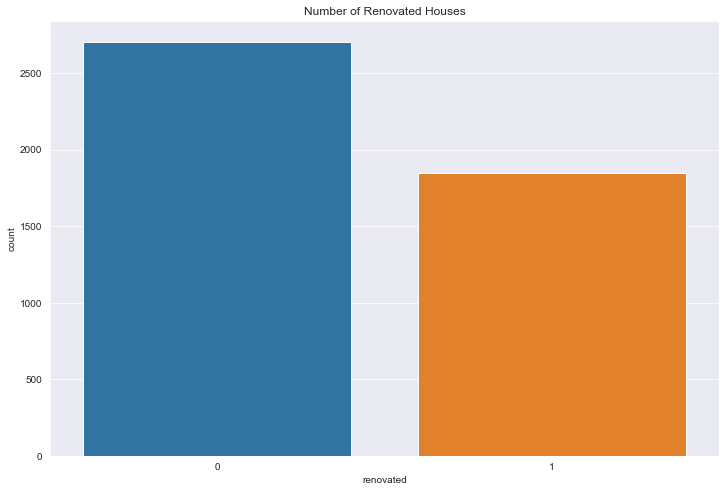

In [26]:
plt.figure(figsize=(12, 8))

sns.countplot(x='renovated', data=house_data)
plt.title("Number of Renovated Houses")

Text(0.5, 1.0, 'Distribution of House Prices')

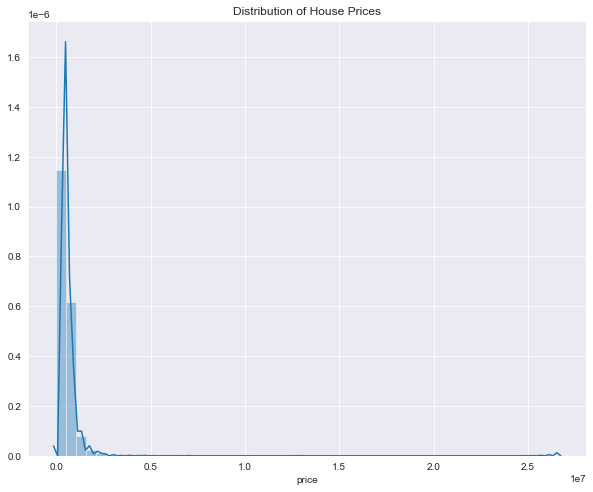

In [32]:
plt.figure(figsize=(10, 8))
sns.distplot(house_data.price, kde=True)
plt.title("Distribution of House Prices")

Text(0.5, 1.0, 'Distribution of House Square Footage')

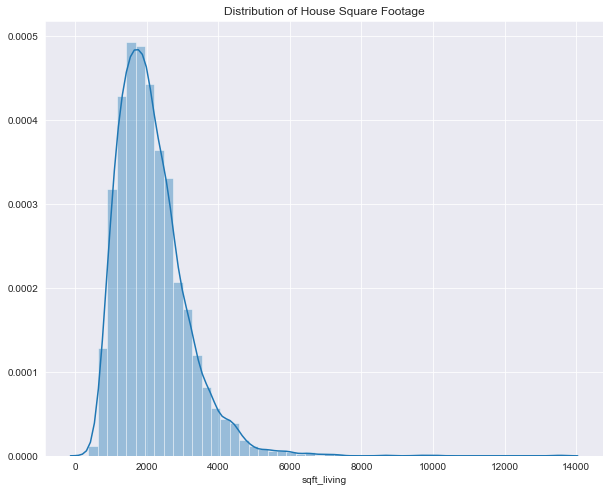

In [35]:
plt.figure(figsize=(10, 8))
sns.distplot(house_data.sqft_living, kde=True)
plt.title("Distribution of House Square Footage")

Text(0.5, 1.0, 'Distribution of Basement Square Footage')

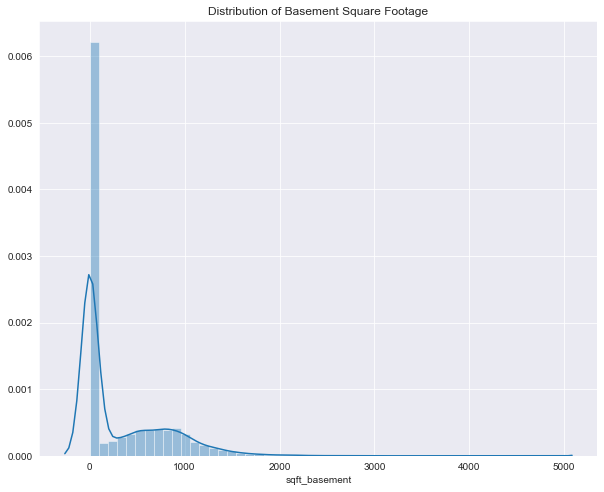

In [37]:
plt.figure(figsize=(10, 8))
sns.distplot(house_data.sqft_basement, kde=True)
plt.title("Distribution of Basement Square Footage")

Text(0.5, 1.0, 'Distribution of Lot Square Footage')

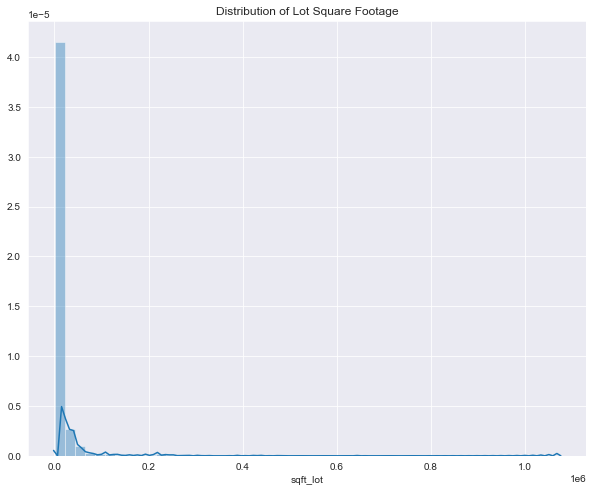

In [36]:
plt.figure(figsize=(10, 8))
sns.distplot(house_data.sqft_lot, kde=True)
plt.title("Distribution of Lot Square Footage")

Text(0.5, 1.0, 'Bedroom Counts')

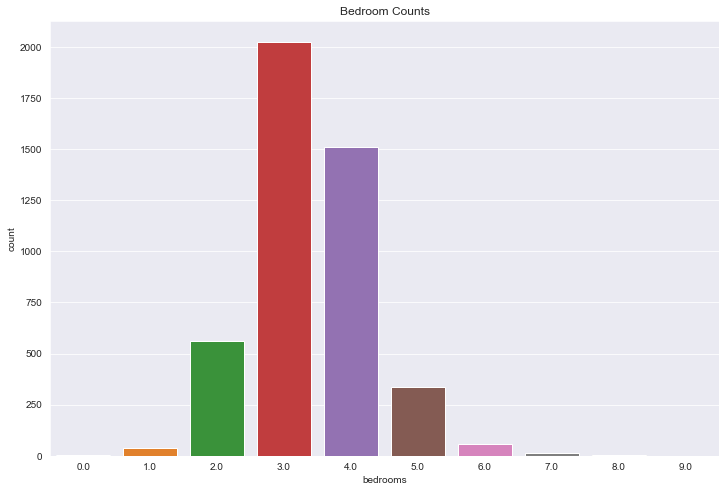

In [33]:
plt.figure(figsize=(12, 8))
sns.countplot(house_data.bedrooms)
plt.title("Bedroom Counts")

Text(0.5, 1.0, 'Bathroom Counts')

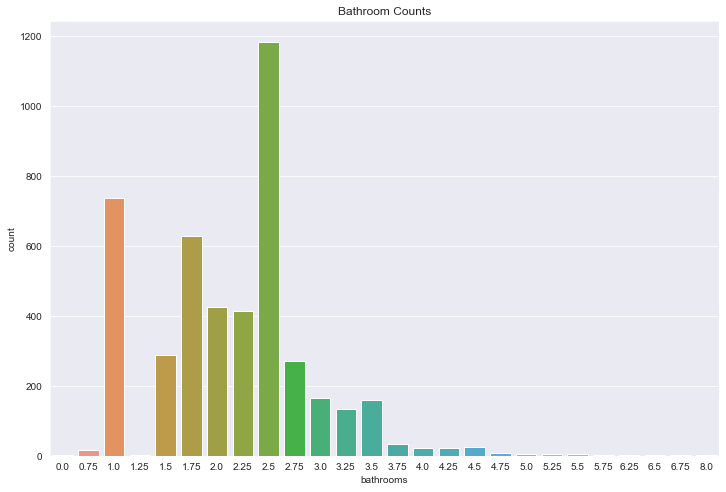

In [38]:
plt.figure(figsize=(12, 8))
sns.countplot(house_data.bathrooms)
plt.title("Bathroom Counts")

Text(0.5, 1.0, 'Floor Counts')

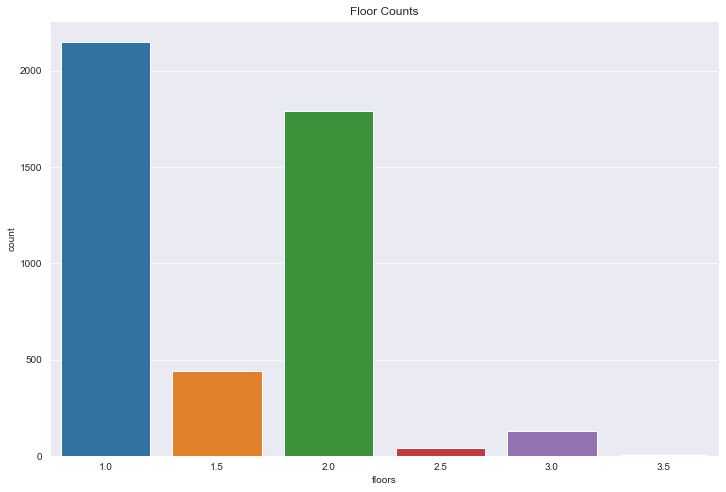

In [39]:
plt.figure(figsize=(12, 8))
sns.countplot(house_data.floors)
plt.title("Floor Counts")

Text(0.5, 1.0, 'Number of Houses with Waterfronts')

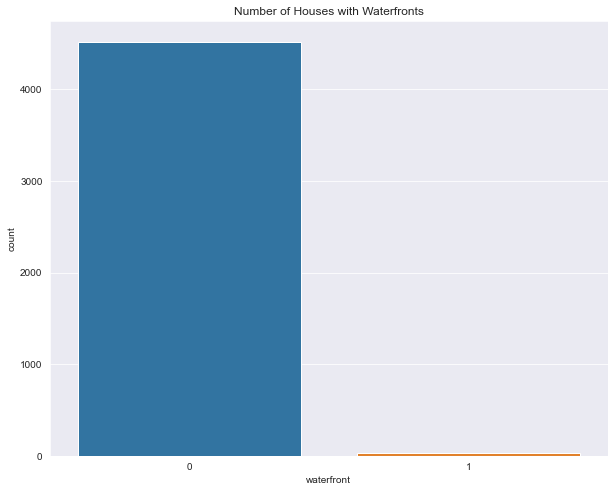

In [40]:
plt.figure(figsize=(10, 8))
sns.countplot(house_data.waterfront)
plt.title("Number of Houses with Waterfronts")

In [41]:
house_data['waterfront'].value_counts()

0    4521
1      30
Name: waterfront, dtype: int64

Only 30 homes in the dataset have a waterfront. 

Text(0.5, 1.0, 'View Counts')

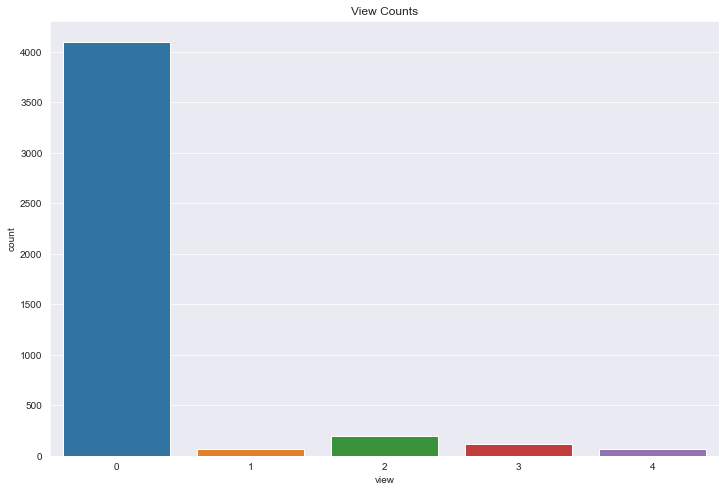

In [42]:
plt.figure(figsize=(12, 8))
sns.countplot(house_data.view)
plt.title("View Counts")

In [44]:
house_data['view'].value_counts()

0    4103
2     201
3     115
1      69
4      63
Name: view, dtype: int64

Unfortunately, there is no data description on the Kaggle page for this dataset. We can probably assume that view=0 indicates there is no notable view at the house. The values after that can either indicate the number of views or the quality of the views from the house.

Text(0.5, 1.0, '# of Floors Counts')

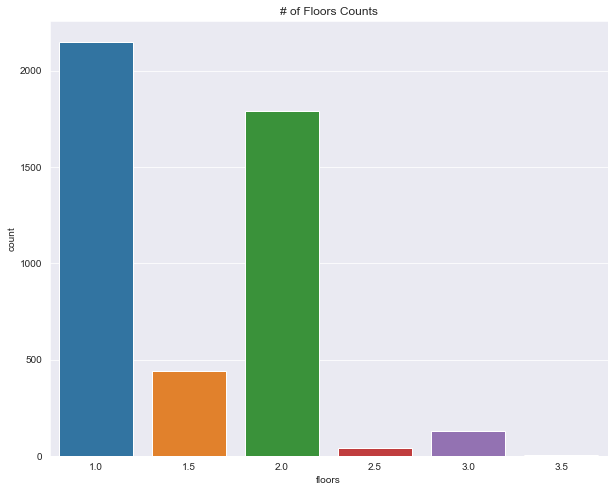

In [62]:
plt.figure(figsize=(10, 8))
sns.countplot(house_data.floors)
plt.title("# of Floors Counts")

Text(0.5, 1.0, 'Condition Counts')

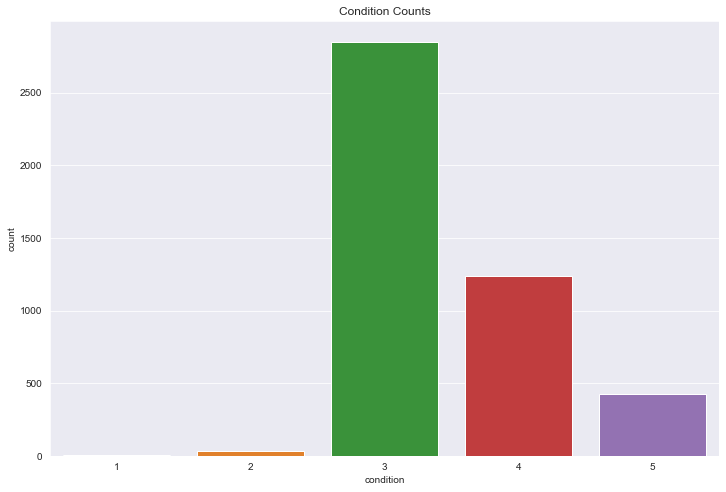

In [46]:
plt.figure(figsize=(12, 8))
sns.countplot(house_data.condition)
plt.title("Condition Counts")

In [47]:
house_data['condition'].value_counts()

3    2851
4    1238
5     425
2      31
1       6
Name: condition, dtype: int64

Most of the houses in the dataset have a condition value of 3+. This makes sense as there is less of a market for houses in bad condition (house flippers for example)

In [48]:
house_data = house_data.drop('country', axis=1)

In [50]:
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,renovated
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,1
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,1


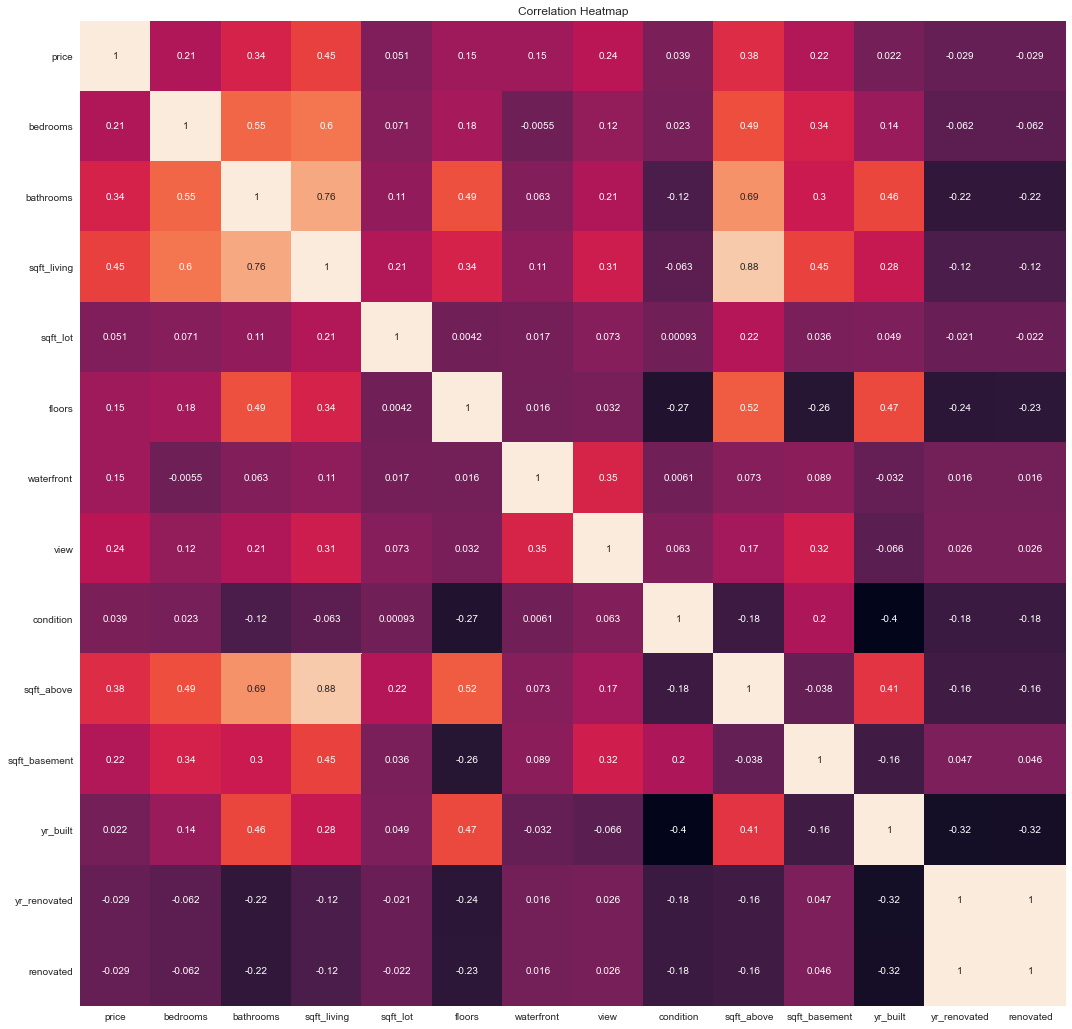

In [56]:
plt.figure(figsize=(15,20))
corr_matrix = house_data.corr()

sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), square=True, annot=True, cbar=False)
plt.title("Correlation Heatmap")
plt.tight_layout()

From this we can clearly see that the things we usually expect to affect a houses price (square footage, # of bedrooms/bathrooms, view, etc.) have highest influence on price. 

In [ ]:
#TODO
#pipeline, model building

## Split Data 

In [61]:
from sklearn.model_selection import train_test_split

X = house_data.drop(['price'], axis=1)
y=np.log1p(house_data['price'])

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=99)

## Pipeline

In [ ]:
#drop date and street -- only 70 dates and the house price distribution is skewed left. Dropping street since there are almost as many streets as there are data points and may cause noise. 

#can impute for city and statezip

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PowerTransformer

drop_cols = ['date', 'street']

categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() <7 or X_train[cname].dtype == "object"]

numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64'] and X_train[cname].nunique() > 7]

numerical_transformer = Pipeline([('scaler', PowerTransformer())])

categorical_transformer = Pipeline([('cat_enc', OneHotEncoder(handle_unknown = 'ignore'))])


preprocessor = ColumnTransformer(
    transformers = [
        ('drop_cols', 'drop', drop_cols),
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
